<a href="https://colab.research.google.com/github/MichaelBarfuss/Intro-to-Analytics/blob/main/IMSE_441_Final_Project(MB).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For the final project, you need to demonstrate your data analytics skills from data understanding, cleaning, descriptive statsistics, visualization and statistical analysis. Your final project should be a clean code and proper markdown. 

- Information about data:-
    >experience_level: 
    - SE: Senior level
    - MI: medium level
    - EN: Entry level
    - EX: Executive level

    >employment_type: 
    - FT(Full-Time)
    - PT(Part-Time)
    - CT(Contract)
    - FL(Freelance)
    
    >company_size: 
    - L large
    - M Medium
    - S Small

1. Import the dataset 'ds_salaries' from github and find out data types. Mention what are the categorical and numerical columns present. Perform data cleaning if needed.
2. Display the column names and # of unique values in each column. Write 2 lines to show your understanding from the unique values (you can choose for any 2 columns).
3. Drop the columns 'salary_currency','employee_residence' & 'remote_ratio' from your data set. Evaluate how many 'Analytics Engineer' are present in the dataset, mention the mean salary for this job title ? Construct a bar plot of salaries for this job profile
4. Construct a histogram of 'salary' for the entire dataset, from the graph comment on salary range for most people.
5. Create a pie plot for 'job_title' and mention the category with highest # of peeople.
6. How many people have salary > 400000 [Hint: you can use '>' sign as a condition]. Display the first 2 rows of those people
7. Do a boxplot for 'salary' in each year. Mention the median value of salary each year.
8. Use a bar/pie plot and label clearly to answer the following
  >a) What %of people have executive level of experience

  >b) What %of people are employed in Large size company

  >c) What %of people in 'USA' have part time jobs
9. Using bar plot try to visualize (label clearly )
  > a) employment_type' vs 'company_location
  
  > b)'company_size' vs 'company_location'

  >c) 'employment_type' vs 'experience_level'

10. Plot a histogram for age, check if it is a normal distribution. Create a 96% CI in 'age', perform ttesting to see if 30 is an acceptable mean value of age or not based on 96% CI. 
11. Construct a Simple Linear Regression Model (build the equation) for 'age' and 'salary' data. Find the regression coefficients, assume x = 'age' and y ='salary'. [This is a toy dataset and has no resemblance with reality]. 


In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower
!pip install pingouin
import pingouin as pg
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import ttest_1samp
from scipy.stats import ttest_1samp
import scipy as scipy
from scipy import stats
from scipy.stats import norm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=9f2dcde505c4f34f8122b484c80781a6badcfe0cf376ecc787959676c2a9a08c
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


# ***1***

In [ ]:

url = "https://raw.githubusercontent.com/KhmAsif/IMSE441/main/ds_salaries.csv"
df = pd.read_csv(url)
df.head(2)
 

In [ ]:
df.dtypes

In [ ]:
df.info()

# **2**

In [35]:
df.nunique()

year                 2
experience_level     4
employment_type      4
job_title           15
salary              97
company_location     2
company_size         3
age                 35
dtype: int64

These are the number of unique values in each column. As you can see there is both 4 values in experience level and employment type.For Experience level the four are SE,MI,EN,EX.

# **3**

In [ ]:
df = df.drop(['salary_currency','employee_residence', 'remote_ratio'], axis=1 )
df.head()

In [ ]:
AnalyticsEngineer=(df[df['job_title']=='Analytics Engineer'])
AnalyticsEngineer

In [9]:
len(AnalyticsEngineer)

6

There are 6 in this dataset.

In [ ]:
AnalyticsEngineer.mean()

Average Salary is 190991.66666666666


In [ ]:
AnalyticsEngineer.plot(kind='bar')

# **4**

In [ ]:
df['salary'].hist(bins=100)
plt.tight_layout()
plt.show()

The salary range for most people definetly fluctuates. 

# **5**

In [13]:
g=df.groupby('job_title').size()

In [ ]:
g.plot(kind='pie',  
       autopct='%.2f', fontsize=10, figsize=(4, 4));

Data Engineer

# **6**

In [ ]:
cry=(df[df['salary']> 400000])
cry

Two people have over that salary

# **7**

In [ ]:
df.boxplot(column=['salary'], by=['year'])

# **8**

In [ ]:
df['experience_level'].value_counts(normalize=True).plot(kind='bar');

Under 5 percent

In [ ]:
df['company_size'].value_counts(normalize=True).plot(kind='bar');

Looks to be about 15 percent

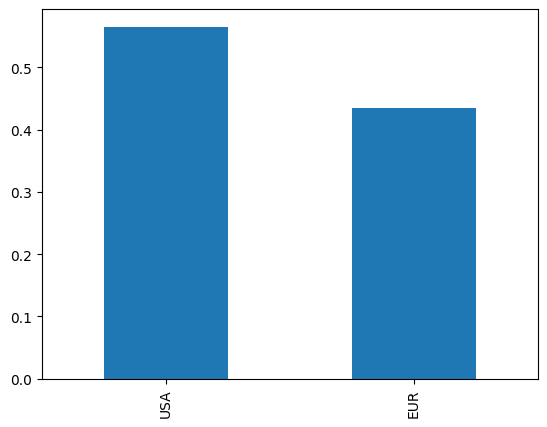

In [19]:
df['company_location'].value_counts(normalize=True).plot(kind='bar');

It looks to be about 55 percent

# **9**

<Axes: xlabel='employment_type'>

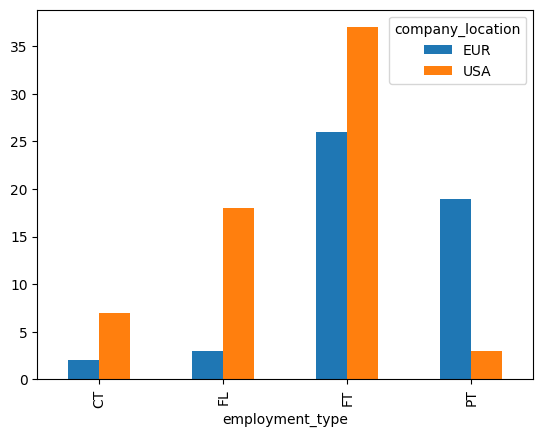

In [20]:
d= df.groupby(['employment_type','company_location']).size().unstack()
d.plot(kind = 'bar')

<Axes: xlabel='company_size'>

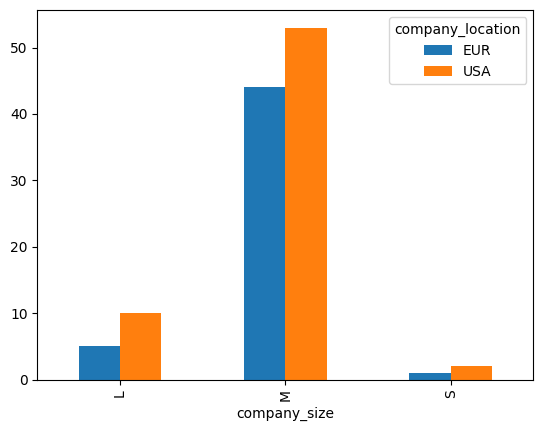

In [21]:
n= df.groupby(['company_size','company_location']).size().unstack()
n.plot(kind = 'bar')

<Axes: xlabel='employment_type'>

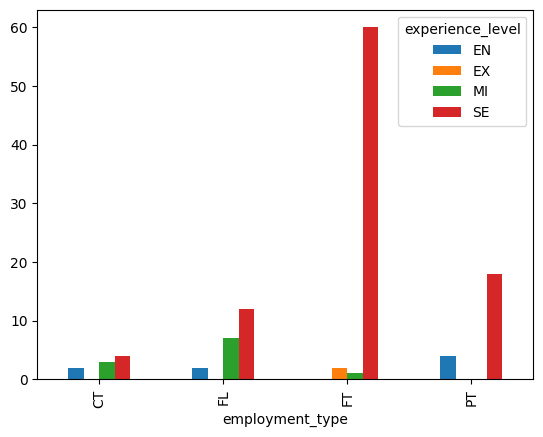

In [22]:
n= df.groupby(['employment_type','experience_level']).size().unstack()
n.plot(kind = 'bar')

# **10**

In [ ]:
df['age'].plot(kind = 'hist',figsize =(9,5), alpha = 0.5)

In [26]:
age=df['age']

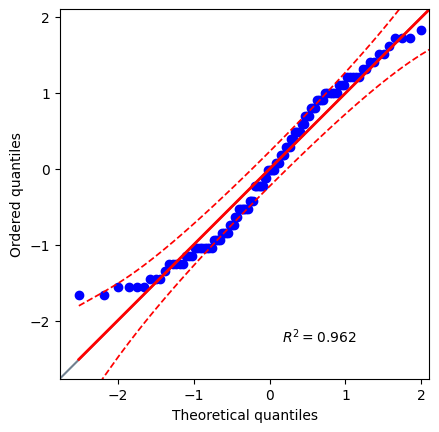

In [27]:
pg.qqplot(age)
plt.show()

In [28]:
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import ttest_1samp
from scipy.stats import ttest_1samp
from scipy.stats import norm

In [29]:
CI= stats.ttest_1samp(df['age'],40).confidence_interval(confidence_level=0.96)
CI

ConfidenceInterval(low=39.281757281509634, high=43.08346010979471)

In [30]:
stats.ttest_1samp(df['age'],30)


TtestResult(statistic=12.221906042968829, pvalue=1.8352675934333261e-22, df=114)

Reject null hypothesis. P value to low

# **11**

In [31]:
import sklearn.linear_model as lm

In [ ]:
x=df[['age']]
y=df['salary']
x

In [33]:
model = lm.LinearRegression()
model.fit(x,y)

LinearRegression()

In [34]:
print('Coefficients: ', model.coef_)
print("y-intercept ", model.intercept_)

Coefficients:  [1540.13479365]
y-intercept  118586.24015009381


y=118586.2402+1540.1348X